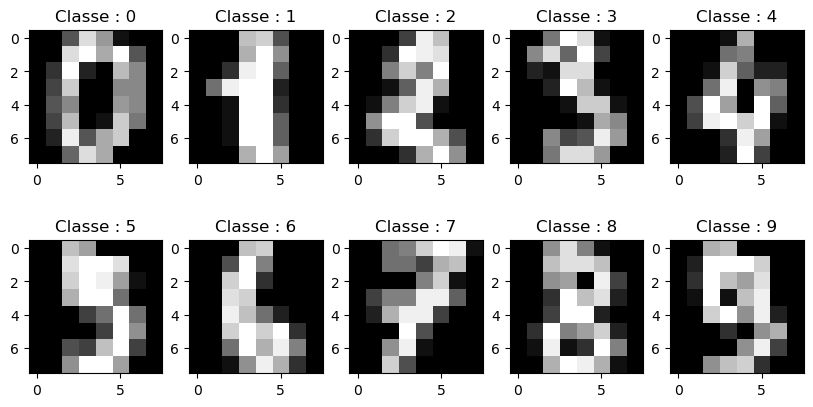

In [16]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np

# Chargez le jeu de données MNIST
digits = load_digits()
X, y = digits["data"], digits["target"]

#X, y = ["data"], ["target"]

# Affichez quelques images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):  #enumerate() allows to complete the subplot, here with 2*5 elements
    ax.imshow(X[i].reshape(8, 8), cmap="gray")
    ax.set_title(f"Classe : {y[i]}")
plt.show()

In [17]:

y


array([0, 1, 2, ..., 8, 9, 8])

In [18]:
X.shape

(1797, 64)

Means that the data set is about 1797 object containing 64 values each (8*8) image here

In [19]:
actual_cl_len = len(np.unique(y)) #length of y, since we're on ground truth so we need to know the number of cluster we want

actual_cl_len

10

Import metrics

In [38]:
def clust_metrics(estimator, data, y = None): #function to evaluate clustering model

    from sklearn.metrics import rand_score, adjusted_rand_score
    from sklearn.metrics import ( mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score)
    from sklearn.metrics import ( homogeneity_score, completeness_score, v_measure_score)
    from sklearn.metrics import fowlkes_mallows_score
    from sklearn.metrics import silhouette_score
    from sklearn.metrics import calinski_harabasz_score
    from sklearn.metrics import davies_bouldin_score
    import pandas as pd

    estimator.fit(data)

    metrics_GT = [rand_score, adjusted_rand_score, mutual_info_score, normalized_mutual_info_score, 
               adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, 
               fowlkes_mallows_score]
    
    metrics_unk = [ silhouette_score, calinski_harabasz_score, davies_bouldin_score]

    score = []
    
    if y is not None :
        for n in metrics_GT :
            met = n(y, estimator.labels_)
            score.append(round(met, 2))

        for n in metrics_unk :
            met = n(data, estimator.labels_)
            score.append(round(met, 2))
    
        return pd.DataFrame({"Clustering Metrics": score}, index=['Rand_Index', 'Adjusted_Rand_Index', 'Mutual_Information', 'Normalized_Mutual_Information', 
               'Adjusted_Mutual_Information', 'Homogeneity_score', 'Completeness_score', 'V_measure_score', 
               'Fowlkes_Mallows_score','Silhouette_score', 'Calinski_Harabasz_score', 'Davies_Bouldin_score'])
    
    else :
        for n in metrics_unk :
            met = n(data, estimator.labels_)
            score.append(round(met, 2))

        return pd.DataFrame({"Clustering Metrics": score}, index=['Silhouette_score', 'Calinski_Harabasz_score', 'Davies_Bouldin_score'])



In [60]:
model = KMeans(n_clusters = len(np.unique(y)), n_init= 10).fit(X)

clust_met(model, X, y)

,Clustering Metrics
Rand_Index,0.94
Adjusted_Rand_Index,0.67
Mutual_Information,1.70
Normalized_Mutual_Information,0.74
Adjusted_Mutual_Information,0.74
Homogeneity_score,0.74
Completeness_score,0.75
V_measure_score,0.74
Fowlkes_Mallows_score,0.70
Silhouette_score,0.18


In [63]:
# PCA Transformation - Reduce dimension to a 2D features shape.
from sklearn.decomposition import PCA

pca = PCA(2)
X2 = pca.fit_transform(X)

model2 = KMeans(n_clusters=10, n_init=10)
y_pred2 = model.fit_predict(X2)


clust_metrics(model2, X2, y)
# Try doing the same using pipeline ?

,Clustering Metrics
Rand_Index,0.89
Adjusted_Rand_Index,0.39
Mutual_Information,1.21
Normalized_Mutual_Information,0.53
Adjusted_Mutual_Information,0.52
Homogeneity_score,0.53
Completeness_score,0.53
V_measure_score,0.53
Fowlkes_Mallows_score,0.45
Silhouette_score,0.39


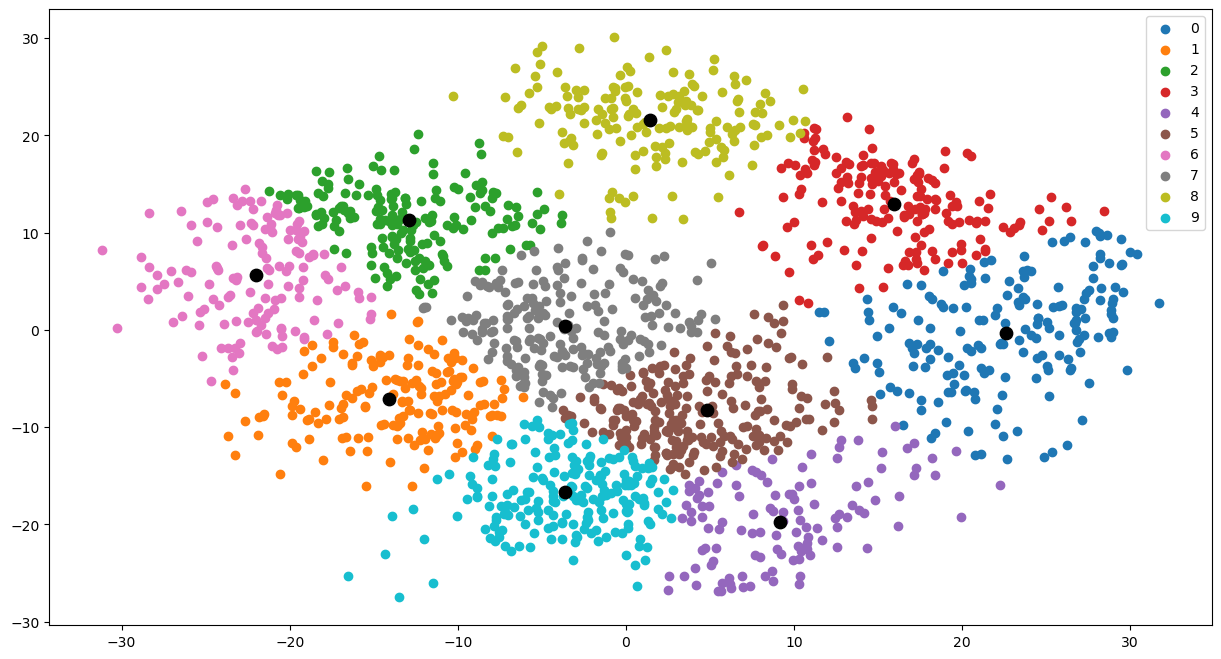

In [44]:
centroids = model.cluster_centers_
unique_labels = np.unique(y_pred2)
 
# Plot 2D result
fig = plt.figure(1, figsize=(15, 8))
for i in unique_labels:
    plt.scatter(X2[y_pred2 == i , 0] , X2[y_pred2 == i , 1] , label=i)
plt.scatter(centroids[:,0] , centroids[:,1] , s=80, color='k')
plt.legend()
plt.show()